## Purpose: Decay 

Demonstration: 
    1. Counting data from a exponentially decaying process
    2. Exponential model
    3. Maximum likelihood with Poisson error distribution.
    4. AmoebaFitter with other error distributions.

Author: Do Kester


import classes

In [1]:
import numpy as numpy
import math

from ExpModel import ExpModel
from PolynomialModel import PolynomialModel
from PoissonErrorDistribution import PoissonErrorDistribution
from AmoebaFitter import AmoebaFitter
from Formatter import formatter as fmt
from Plotter import plotFit
import matplotlib.pyplot as plt
from Tools import printclass

define some constants

In [2]:
N = 201
a = 17.8
b = -0.2

make a 3-degree polynomial

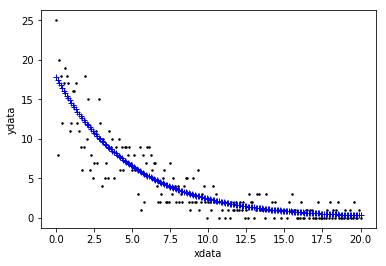

In [3]:
x = numpy.linspace( 0.0, 20.0, N, dtype=float )
ym = a * numpy.exp( b * x )

#y = ym + numpy.random.lognormal( ym, numpy.sqrt( ym ), N )
#y = numpy.asarray( y, dtype=int )
y = numpy.random.poisson( ym )
# plot the data along with the "truth"
plotFit( x, y, show=False )
plt.plot( x, ym, 'b+')
plt.show()

Define the model

In [4]:
mdl = ExpModel( )
print( mdl )


Exp: f( x:p ) = p_0 * exp( p_1 * x )


define the fitter: AmoebaFitter with error distribution

In [5]:
fitter = AmoebaFitter( x, mdl, errdis="poisson" )
 
# find the parameters
param = fitter.fit( y )

# show all attributes of the fitter class 
printclass( fitter )

+++++++++++++++++++++++++++++++++++++++++++++++++++++++
AmoebaFitter
+++++++++++++++++++++++++++++++++++++++++++++++++++++++
chisq           872.3366414470333
errdis          poisson
fitIndex        None
fixedScale      None
imageAssistant  None
isChisq         False
iter            34
keep            None
landscape       <MaxLikelihoodFitter._LogL object at 0x114fcdac8>
logLikelihood   -353.7244792682057
maxIter         2000
model           Exp
ndim            1
npfit           2
ntrans          68
nxdata          201
plotfreq        0
plotter         <IterationPlotter.IterationPlotter object at 0x114fcdbe0>
power           2.0
simplex         [[17.02992505 -0.19863928]  [17.04055006 -0.19876946]  [17.03484097 -0.19860975]  ]
sumwgt          201
tolerance       0.0001
tooLarge        100
values          [353.7244792682057  353.7244869891911  353.7245448977835  ]
verbose         1
xdata           [0.0  0.1  0.2  0.30000000000000004  0.4  0.5  0.6000000000000001  0.7000000000000001  ...

In [6]:
print( "Parameters :", fmt( param ) )
print( "StDevs     :", fmt( fitter.stdevs ) )
print( "Chisq      :", fmt( fitter.chisq ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-100,100] ) ) )

Parameters : [   17.030   -0.199]
StDevs     : [    0.571    0.010]
Chisq      :   872.337
Scale      :     2.056
Evidence   :  -160.461


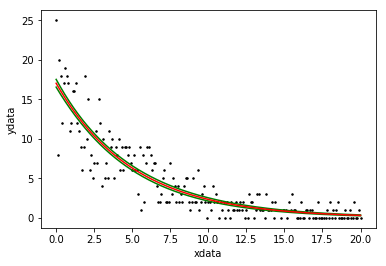

In [7]:
plotFit( x, y, mdl, fitter=fitter )

In [8]:
fitter = AmoebaFitter( x, mdl )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ) )

[   17.220   -0.202]   871.766        25


In [9]:
fitter = AmoebaFitter( x, mdl, errdis="gauss" )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ) )

[   17.217   -0.202]   871.766        24


In [10]:
fitter = AmoebaFitter( x, mdl, errdis="laplace" )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ) )

[   19.223   -0.219]   924.207        46


In [11]:
fitter = AmoebaFitter( x, mdl, errdis="cauchy" )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ) )

[   20.360   -0.224]  1008.367        22


In [12]:
fitter = AmoebaFitter( x, mdl, errdis="poisson" )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ))

[   17.038   -0.199]   872.297        29
